In [1]:
from os import listdir
import numpy as np
import cv2
from matplotlib import image
# load all images in a directory
loaded_images = list()
# On suppose que la base d'images est dans le dossier "obj_decoys" sur votre Google Drive
# Il faut charger Drive dans Colab

path='C:/Users/admin/Desktop/midvi s3/Image mining/obj_decoys'
for filename in listdir(path):
	# load image
	img_data = image.imread(path+'/' + filename)
	# store loaded image
	loaded_images.append(img_data)
	# Activer l'instruction ci-dessus pour afficher les nom de images et les tailles
  # print(' %s %s ' % (filename, img_data.shape))

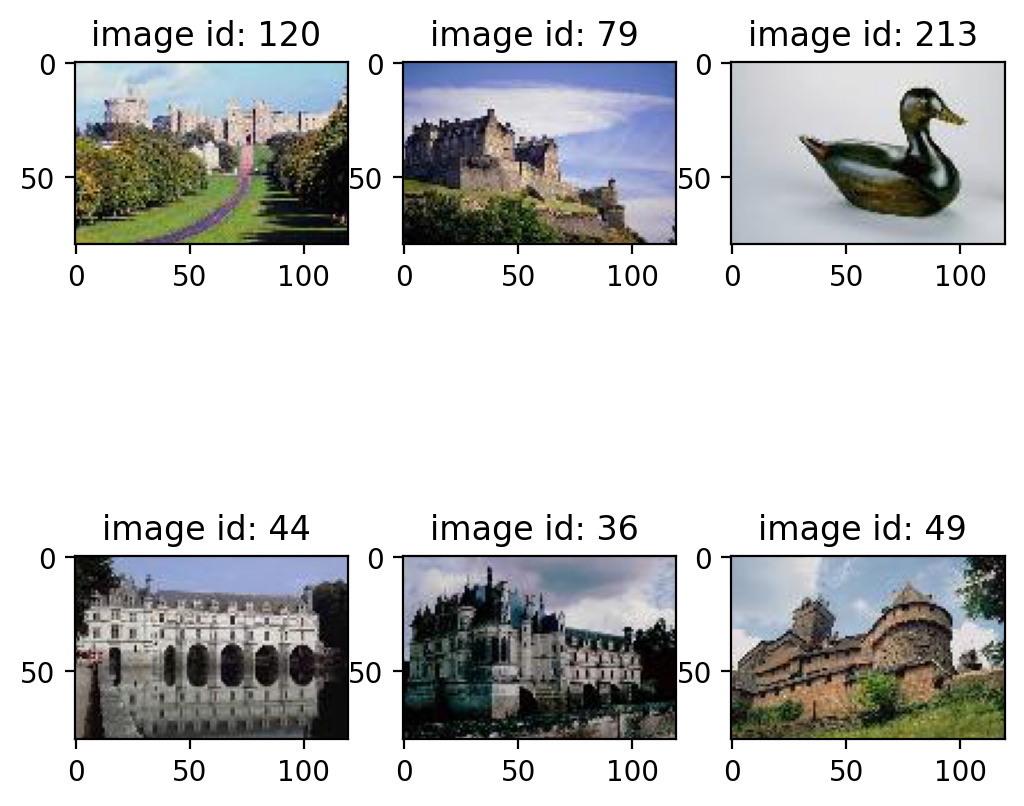

In [2]:
# Afficher les 6 premières images
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(6, 6), dpi=200)
import random
id=random.sample(range(270), 6)
for i in range(6):
  ax1 = fig.add_subplot(2, 3, i+1)
  ax1.imshow(loaded_images[id[i]])
  ax1.set_title('image id: %s '% (id[i]))

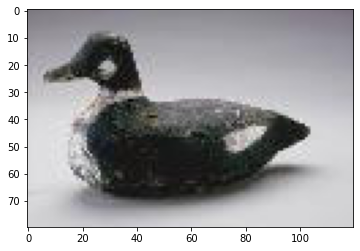

In [3]:
img_requete = image.imread('C:/Users/admin/Desktop/midvi s3/Image mining/img.jpg')
plt.imshow(img_requete)

In [6]:
from skimage.feature import greycomatrix, greycoprops
from skimage import data
from skimage import util, exposure, data
import pywt
from skimage import io
from skimage.color import rgb2gray

In [9]:
def texture_extract(img):
    distance = [1]
    angles = [0, np.pi/4, np.pi/2, 3*np.pi/4]
    properties = ['correlation', 'homogeneity', 'contrast', 'energy']

    gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    blur = cv2.GaussianBlur(gray_img, (5,5), 0)

    texture_features = []
    for i in range(0, blur.shape[0], 4):
        for j in range(0, blur.shape[1], 4):
            block = blur[i:i+4, j:j+4]

            glcm_mat = greycomatrix(block, distances=distance, angles=angles, symmetric=True, normed=True)
            block_glcm = np.hstack([greycoprops(glcm_mat, props).ravel() for props in properties])
            texture_features.append(block_glcm)

    return np.concatenate(texture_features)

In [10]:
texture_extract(img_requete)

array([0.95096036, 0.33442892, 0.49356665, ..., 0.52115731, 0.62081935,
       0.69388867])

In [11]:
texture_extract(img_requete).shape

(9600,)